### Patterns in Data

We can make use of parse_date when importing data to convert string to date types

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv(r"./datasets/divorce.csv", parse_dates =["divorce_date", "marriage_date", "dob_man", "dob_woman"])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


In [8]:
import plotly.graph_objs as go
import pandas as pd

# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv(r"./datasets/divorce.csv", parse_dates =["divorce_date", "marriage_date", "dob_man", "dob_woman"])

# Extract year from marriage_date and divorce_date columns
divorce['marriage_year'] = pd.DatetimeIndex(divorce['marriage_date']).year
divorce['divorce_year'] = pd.DatetimeIndex(divorce['divorce_date']).year

# Group by year and count number of marriages and divorces
marriage_count = divorce.groupby('marriage_year').size().reset_index(name='marriage_count')
divorce_count = divorce.groupby('divorce_year').size().reset_index(name='divorce_count')

# Merge the two dataframes on year
merged_df = pd.merge(marriage_count, divorce_count, left_on='marriage_year', right_on='divorce_year', how='outer')

# Create side by side bar plot using plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=merged_df['marriage_year'], y=merged_df['marriage_count'], name='Marriages', marker_color='blue'))
fig.add_trace(go.Bar(x=merged_df['divorce_year'], y=merged_df['divorce_count'], name='Divorces', marker_color='red'))

fig.update_layout(title='Number of Marriages and Divorces Every Year', xaxis_title='Year', yaxis_title='Count')
fig.show()

In [9]:
# Convert the marriage_date column to DateTime values
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])

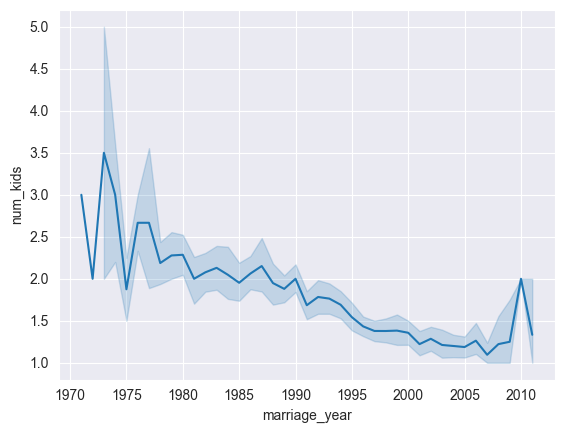

In [19]:
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

# Create a line plot showing the average number of kids by year

sns.lineplot( data = divorce, x = "marriage_year", y = "num_kids")
plt.show()